In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#import warnings
#warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("processed_train.csv")

In [4]:
df.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_age,Item_Weight_zsr,Item_Visibility_zsr,Item_MRP_zsr,Item_Outlet_Sales_zsr,Item_Outlet_Sales_Log
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.927507,9,0.583333,0.577129,25,0.828359,0.970675,1.747351,0.910548,0.455606
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.072068,3,1.000000,0.063941,15,1.625269,0.908058,1.488936,1.018381,0.061980
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.468288,9,0.583333,0.321781,25,1.104972,0.956861,0.010040,0.049235,0.278980
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.640093,0,0.541667,0.108990,26,1.505785,1.281683,0.660011,0.849053,0.103450
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.095805,1,0.083333,0.149887,37,0.915595,1.281683,1.399138,0.695332,0.139664


In [5]:
# Split the dataset into features 
x=df.drop(['Item_Outlet_Sales','Item_Outlet_Sales_Log'],axis=1)
x.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_age,Item_Weight_zsr,Item_Visibility_zsr,Item_MRP_zsr,Item_Outlet_Sales_zsr
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.282525,0.082240,0.927507,9,0.583333,25,0.828359,0.970675,1.747351,0.910548
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.081274,0.098799,0.072068,3,1.000000,15,1.625269,0.908058,1.488936,1.018381
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.770765,0.085893,0.468288,9,0.583333,25,1.104972,0.956861,0.010040,0.049235
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.871986,0.000000,0.640093,0,0.541667,26,1.505785,1.281683,0.660011,0.849053
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.260494,0.000000,0.095805,1,0.083333,37,0.915595,1.281683,1.399138,0.695332


In [6]:
# Split the dataset into target
y=df['Item_Outlet_Sales']
y.head()

0    0.577129
1    0.063941
2    0.321781
3    0.108990
4    0.149887
Name: Item_Outlet_Sales, dtype: float64

In [7]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
print(len(x_train),len(y_train))

6818 6818


In [9]:
print(len(x_test),len(y_test))

1705 1705


In [10]:
x['Outlet_Identifier']

0       9
1       3
2       9
3       0
4       1
       ..
8518    1
8519    7
8520    6
8521    3
8522    8
Name: Outlet_Identifier, Length: 8523, dtype: int64

In [11]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [12]:
#get feature importance and select top features
importances=rf.feature_importances_

# Select the top features
num_features = min(10, len(importances))  # Get the top 10 or fewer if there are less
important_features = x.columns[np.argsort(importances)[-num_features:]]


In [13]:
# Reducing X to only important features
x_train_important = x_train[important_features]
x_test_important = x_test[important_features]

In [14]:
print(x_train.shape,x_train_important.shape)

(6818, 37) (6818, 10)


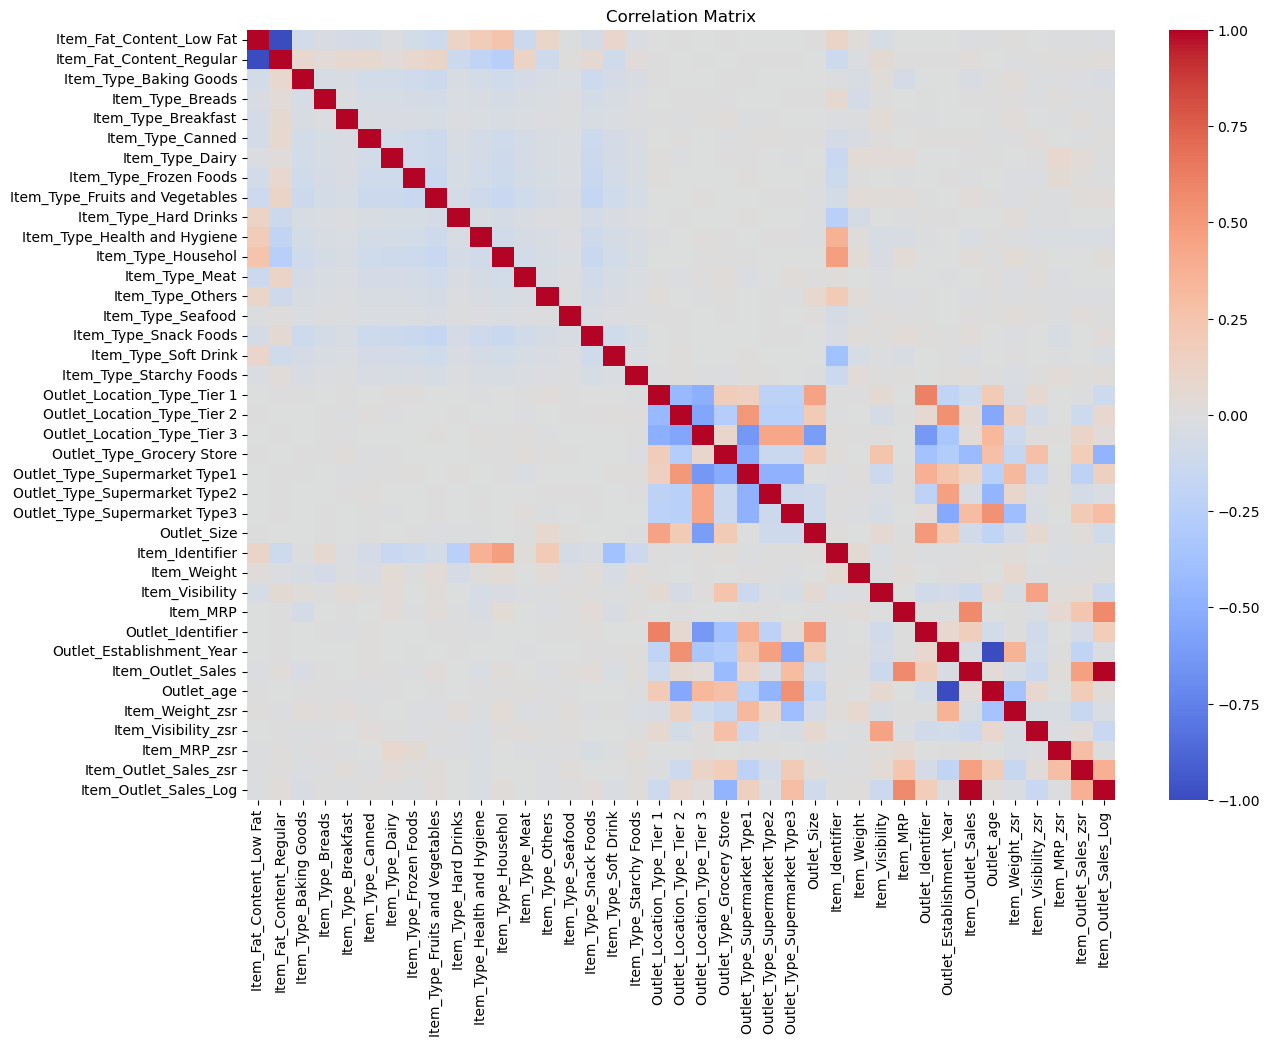

In [15]:
# Plot the correlation matrix
correlation_matrix=df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [16]:
# Initialize simpler models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(max_depth=5, min_samples_split=2, n_estimators=100),
     'MLP ' : MLPRegressor(hidden_layer_sizes=(100), max_iter=300),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
    
}

#Function to evaluate model using cross -validation
def evaluate_models(models,x,y):
    results={}
    for name, model in models.items():
        # perform 5- fold cross-validation
        cv_scores=cross_val_score(model,x,y,cv=5,scoring='r2')
        results[name]={
            "Mean R2" :cv_scores.mean(),
            "Standard Deviation" : cv_scores.std()
        }
    return results

# Evaluate all models on the important features
model_results = evaluate_models(models, x_train_important, y_train)

# Display results
for model, metrics in model_results.items():
    print(f"{model}: Mean R2 = {metrics['Mean R2']:.4f}, Standard Deviation = {metrics['Standard Deviation']:.4f}")

# Choose the best model based on the highest mean R² score
best_model_name = max(model_results, key=lambda x: model_results[x]["Mean R2"])
print(f"\nBest Model: {best_model_name}")

Linear Regression: Mean R2 = 0.7272, Standard Deviation = 0.0136
Random Forest: Mean R2 = 0.8480, Standard Deviation = 0.0077
MLP : Mean R2 = 0.6150, Standard Deviation = 0.1015
XGBoost: Mean R2 = 0.8465, Standard Deviation = 0.0096

Best Model: Random Forest


In [24]:

# Define the parameter distribution for RandomForestRegressor
param_dist = {
    'n_estimators': [100, 200, 300],             # Number of trees in the forest
    'max_depth': [3, 5, 7],                      # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],             # Minimum samples required to split an internal node
}

# Initialize the RandomForestRegressor
rfr = RandomForestRegressor(random_state=42)

# Use RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(
    estimator=rfr,
    param_distributions=param_dist,
    n_iter=10,                # Number of random combinations to try
    scoring='r2',
    cv=5,                     # 5-fold cross-validation
    n_jobs=-1,                # Use all available processors
    random_state=42,           # Ensures reproducible results
    verbose=True,
    refit=True
    
)

# Fit the model to the training data
random_search.fit(x_train_important, y_train)

# Output the best parameters and best score
best_rf_model = random_search.best_estimator_
best_params = random_search.best_params_
best_score = random_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best R² Score:", best_score)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 7}
Best R² Score: 0.8671707387184495


In [25]:
# Evaluate the best  Random Forest model on the test set
y_pred_best_rf = best_rf_model.predict(x_test_important)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

# Output the results
print("Mean Squared Error :", mse_best_rf)
print("R² Score :", r2_best_rf)

Mean Squared Error : 0.008154445789484039
R² Score : 0.8655350877566921


In [35]:
best_rf=RandomForestRegressor(n_estimators=100,random_state=42,min_samples_split=5, max_depth=7)
best_rf.fit(x_train_important,y_train)

RandomForestRegressor(max_depth=7, min_samples_split=5, random_state=42)

In [37]:
# Evaluate the best Random Forest model on the test set
y_pred_best_rf1 = best_rf.predict(x_test_important)
mse_best_rf1 = mean_squared_error(y_test, y_pred_best_rf1)
r2_best_rf1 = r2_score(y_test, y_pred_best_rf1)

# Output the results
print("Mean Squared Error (Best Random Forest):", mse_best_rf1)
print("R² Score (Best Random Forest):", r2_best_rf1)

Mean Squared Error (Best  XGB): 0.008154445789484039
R² Score (Best  XGB): 0.8655350877566921
